In [1292]:
## 필요한 모듈 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import matplotlib as mpl

In [1293]:
## 한글설정
path = 'C:\Windows\Fonts\H2HDRM.TTF'

font_name = fm.FontProperties(fname= path).get_name()
rc('font', family = font_name)

## 마이너스
mpl.rcParams['axes.unicode_minus']= False

In [1294]:
## 필요한 엑셀 데이터 불러오기
df_data_ma = pd.read_csv('./시도모의 연령(5세계급)모의 교육정도별 출생(2008_2021).csv',encoding= 'euc-kr' )
df_data_fa = pd.read_csv('./시도부의 연령(5세계급)부의 교육정도별 출생(2008_2021).csv',encoding= 'euc-kr')
df_data_dis = pd.read_csv('./전국 연령별,장애유형별,성별 등록장애인수(2008_2021).csv',encoding= 'euc-kr')
df_data_pop = pd.read_csv('./행정구역(시군구)별1세별 주민등록인구(2008_2021).csv',encoding= 'euc-kr')

In [1295]:
## 형태 확인
df_data_ma.head(20)

,시도별,모의 연령(5세계급)별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 19
0,전국,계,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562,NaN
1,전국,계,무학,출생[명],명,352,377,379,384,371,265,269,237,153,149,244,238,281,205,NaN
2,전국,계,초등학교,출생[명],명,1663,1580,1632,1638,1490,1343,1203,1075,924,811,607,644,551,434,NaN
3,전국,계,중고등학교,출생[명],명,167397,150203,150424,143917,137969,116785,107723,102147,90332,76165,65569,58735,51110,44836,NaN
4,전국,계,중학교,출생[명],명,8482,8123,8122,8436,8250,7410,6600,6031,5559,4806,4187,3964,3404,2834,NaN
5,전국,계,고등학교,출생[명],명,158915,142080,142302,135481,129719,109375,101123,96116,84773,71359,61382,54771,47706,42002,NaN
6,전국,계,초대.전문대이상,출생[명],명,292447,288879,313814,323625,343255,316848,324434,332582,311005,276099,255070,237054,213601,208489,NaN
7,전국,계,대학(교),출생[명],명,268460,264593,286636,295019,311734,286421,292219,299306,279666,247470,228164,211580,190368,185278,NaN
8,전국,계,대학원 이상,출생[명],명,23987,24286,27178,28606,31521,30427,32215,33276,31339,28629,26906,25474,23233,23211,NaN
9,전국,계,미상,출생[명],명,4033,3810,3922,1701,1465,1214,1806,2379,3829,4547,5332,6005,6794,6598,NaN


In [1296]:
## 출산시 모의 나이 데이터 간소화
df_data_ma_age = df_data_ma.iloc[:103:10,:19]

df_data_ma_age.set_index('모의 연령(5세계급)별',inplace=True)
df_data_ma_age

,시도별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
모의 연령(5세계급)별,,,,,,,,,,,,,,,,,,
계,전국,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세미만,전국,총계,출생[명],명,46,27,34,19,29,20,22,16,15,6,8,10,11,8
15 - 19세,전국,총계,출생[명],명,2728,2788,2900,2979,2917,2813,2527,2211,1907,1520,1292,1096,907,492
20 - 24세,전국,총계,출생[명],명,28173,24911,24538,24648,24619,22051,21171,20514,19078,15768,13313,11303,9612,7599
25 - 29세,전국,총계,출생[명],명,168893,155906,147197,137008,127192,102801,96192,94622,85036,74026,65029,57834,50631,45781
30 - 34세,전국,총계,출생[명],명,198748,192112,214616,221434,239223,220346,221145,216252,192968,161045,143067,131334,118909,115290
35 - 39세,전국,총계,출생[명],명,59596,60694,70835,74245,78982,77183,82226,92081,94313,92645,91101,87300,78315,76238
40 - 44세,전국,총계,출생[명],명,6537,7303,8840,10126,11098,10714,11523,12138,12336,12202,12417,13242,13482,14670
45 - 49세,전국,총계,출생[명],명,334,330,389,443,392,284,308,335,371,373,389,398,340,362


In [1297]:
## 자료에 숫자만 남기기
df_data_ma_age.drop(['시도별', '교육정도별', '항목', '단위'], axis= 1, inplace= True)
df_data_ma_age

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
모의 연령(5세계급)별,,,,,,,,,,,,,,
계,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세미만,46,27,34,19,29,20,22,16,15,6,8,10,11,8
15 - 19세,2728,2788,2900,2979,2917,2813,2527,2211,1907,1520,1292,1096,907,492
20 - 24세,28173,24911,24538,24648,24619,22051,21171,20514,19078,15768,13313,11303,9612,7599
25 - 29세,168893,155906,147197,137008,127192,102801,96192,94622,85036,74026,65029,57834,50631,45781
30 - 34세,198748,192112,214616,221434,239223,220346,221145,216252,192968,161045,143067,131334,118909,115290
35 - 39세,59596,60694,70835,74245,78982,77183,82226,92081,94313,92645,91101,87300,78315,76238
40 - 44세,6537,7303,8840,10126,11098,10714,11523,12138,12336,12202,12417,13242,13482,14670
45 - 49세,334,330,389,443,392,284,308,335,371,373,389,398,340,362


In [1298]:
df_data_ma_age
type(df_data_ma_age)

pandas.core.frame.DataFrame

In [1299]:
## 매개변수로 dataframe을 넣어 각 나이별 비율이 어떻게 되는지 계산해서 데이터 프레임으로 만들어주는 함수
## 매개변수의 형태로 index1의 값은 그 뒤의 모든 데이터 값의 합으로 되어있어야 의미있는 함수 사용 가능
def calcul_ratio(df):
    if type(df) == pd.DataFrame:
        list_index = df.index
        list_columns = df.columns
        dict_data = {}
        
        for i in range(0,len(list_columns)):
            list_data = []
            for j in range(0,len(list_index)-1):
                list_data.append(df.iloc[j+1,i] / df.iloc[0,i] *100)
                # print(list_data)
                dict_data[list_columns[i]] = list_data
                # print(dict_data)
                
        df_result = pd.DataFrame(dict_data, index=list_index[1:])
        return df_result        
    else:
        print("자료가 데이터 프레임이 아닙니다.")

In [1300]:
# 비율계산 함수 사용
df_ratio_result = calcul_ratio(df_data_ma_age)

print(df_ratio_result)

                 2008 년     2009 년     2010 년     2011 년     2012 년   
모의 연령(5세계급)별                                                          
15세미만          0.009874   0.006069   0.007231   0.004032   0.005985  \
15 - 19세       0.585543   0.626730   0.616797   0.632128   0.602002   
20 - 24세       6.047110   5.599878   5.218952   5.230178   5.080797   
25 - 29세      36.251535  35.046949  31.307120  29.072390  26.249510   
30 - 34세      42.659672  43.185890  45.646371  46.987152  49.370137   
35 - 39세      12.791806  13.643731  15.065795  15.754406  16.300072   
40 - 44세       1.403115   1.641681   1.880167   2.148685   2.290373   
45 - 49세       0.071690   0.074182   0.082736   0.094002   0.080900   
50세이상          0.006869   0.006294   0.013187   0.014005   0.009906   
연령미상           0.172787   0.168597   0.161643   0.063022   0.010319   

                 2013 년     2014 년     2015 년     2016 년     2017 년   
모의 연령(5세계급)별                                                          
15세미만

In [1301]:
# 한 열의 값을 모두 더했을때 100이 나오는지, 함수가 의도대로 작동했는지 확인
check = df_ratio_result.iloc[:,0]

check.sum()

100.0

In [1302]:
# 그래프 그릴 때 label값으로 정해주려는 변수 선언
list_collumn = df_ratio_result.index[:]
list_collumn

Index(['15세미만', '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세',
       '40 - 44세', '45 - 49세', '50세이상', '연령미상'],
      dtype='object', name='모의 연령(5세계급)별')

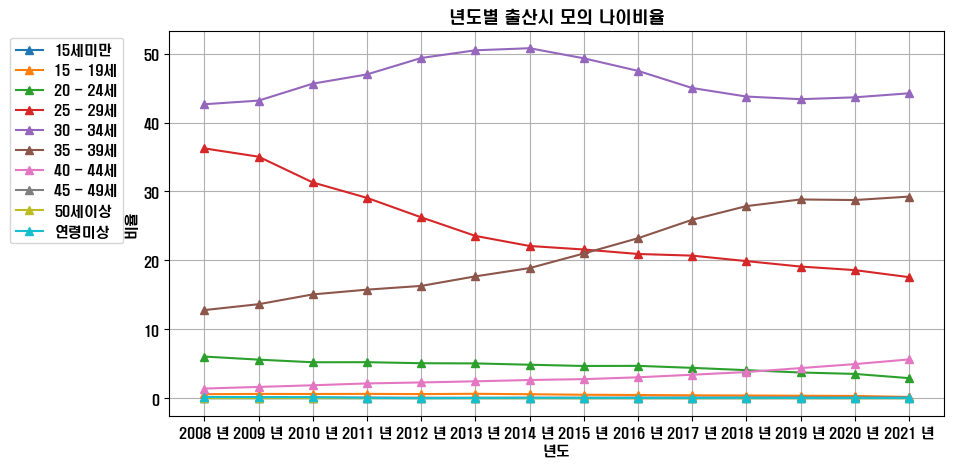

In [1303]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 년도별 출산시 모의 나이비율 그래프 그리기
plt.plot(df_ratio_result.T, '^-', label = list_collumn)

# 그래프 타이틀과 label 설정
plt.title('년도별 출산시 모의 나이비율')
plt.xlabel('년도')
plt.ylabel('비율')


# 그래프 출력
plt.grid(True)
plt.legend(bbox_to_anchor=(-0.05, 1))
plt.show()

In [1304]:
## 형태 확인
df_data_fa.head(20)

,시도별,부의 연령(5세계급)별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 19
0,전국,계,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562,NaN
1,전국,계,무학,출생[명],명,252,243,255,245,230,161,189,173,151,141,148,149,168,99,NaN
2,전국,계,초등학교,출생[명],명,1962,1660,1514,1361,1201,1052,903,818,667,616,431,410,320,295,NaN
3,전국,계,중고등학교,출생[명],명,151914,138172,140163,136288,132569,114030,107162,104856,95256,82590,70773,64558,57801,52270,NaN
4,전국,계,중학교,출생[명],명,8241,7427,7209,6944,6486,5759,5167,4749,4312,3722,3129,2852,2603,2162,NaN
5,전국,계,고등학교,출생[명],명,143673,130745,132954,129344,126083,108271,101995,100107,90944,78868,67644,61706,55198,50108,NaN
6,전국,계,초대.전문대이상,출생[명],명,306342,299072,322085,328094,344696,315501,321169,326530,303107,267425,247503,229125,205152,199359,NaN
7,전국,계,대학(교),출생[명],명,265245,259801,279974,285634,300656,274675,279897,285180,264772,232998,215377,199507,178338,172570,NaN
8,전국,계,대학원 이상,출생[명],명,41097,39271,42111,42460,44040,40826,41272,41350,38335,34427,32126,29618,26814,26789,NaN
9,전국,계,미상,출생[명],명,5422,5702,6154,5277,5854,5711,6012,6043,7062,6999,7967,8434,8896,8539,NaN


In [1305]:
## 출산시 부의 나이 데이터 간소화
df_data_fa_age = df_data_fa.iloc[:103:10,:19]

df_data_fa_age.set_index('부의 연령(5세계급)별',inplace=True)
df_data_fa_age

,시도별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
부의 연령(5세계급)별,,,,,,,,,,,,,,,,,,
계,전국,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세 미만,전국,총계,출생[명],명,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15 - 19세,전국,총계,출생[명],명,533,459,603,749,768,726,701,614,524,316,254,202,142,91
20 - 24세,전국,총계,출생[명],명,7050,5812,5877,6315,6211,6306,6360,6786,6522,5327,4350,3493,2862,2230
25 - 29세,전국,총계,출생[명],명,83340,77502,73309,69549,63733,50479,46247,45153,40563,35206,31212,27894,24521,22284
30 - 34세,전국,총계,출생[명],명,209270,195345,205354,205090,215753,193995,193602,187484,164694,134872,116784,103735,92679,88068
35 - 39세,전국,총계,출생[명],명,127976,126166,137984,138749,142641,131473,133148,140994,138323,129431,123549,116665,103406,99024
40 - 44세,전국,총계,출생[명],명,27005,28816,34232,37866,41606,40043,41732,43404,41444,38723,36679,36314,35303,36156
45 - 49세,전국,총계,출생[명],명,5371,5398,6093,6506,6848,6723,7105,7854,8323,8394,8671,9026,8355,7922


In [1306]:
## 자료에 숫자만 남기기
df_data_fa_age.drop(['시도별', '교육정도별', '항목', '단위'], axis= 1, inplace= True)
df_data_fa_age

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
부의 연령(5세계급)별,,,,,,,,,,,,,,
계,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세 미만,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15 - 19세,533,459,603,749,768,726,701,614,524,316,254,202,142,91
20 - 24세,7050,5812,5877,6315,6211,6306,6360,6786,6522,5327,4350,3493,2862,2230
25 - 29세,83340,77502,73309,69549,63733,50479,46247,45153,40563,35206,31212,27894,24521,22284
30 - 34세,209270,195345,205354,205090,215753,193995,193602,187484,164694,134872,116784,103735,92679,88068
35 - 39세,127976,126166,137984,138749,142641,131473,133148,140994,138323,129431,123549,116665,103406,99024
40 - 44세,27005,28816,34232,37866,41606,40043,41732,43404,41444,38723,36679,36314,35303,36156
45 - 49세,5371,5398,6093,6506,6848,6723,7105,7854,8323,8394,8671,9026,8355,7922


In [1307]:
# 비율계산 함수 사용
df_ratio_result_fa = calcul_ratio(df_data_fa_age)

print(df_ratio_result_fa)

                 2008 년     2009 년     2010 년     2011 년     2012 년   
부의 연령(5세계급)별                                                          
15세 미만         0.000000   0.000000   0.000000   0.000212   0.000000  \
15 - 19세       0.114404   0.103181   0.128251   0.158934   0.158498   
20 - 24세       1.513226   1.306511   1.249971   1.340010   1.281808   
25 - 29세      17.888266  17.422092  15.591987  14.757939  13.153029   
30 - 34세      44.918136  43.912654  43.676450  43.519039  44.526468   
35 - 39세      27.469027  28.361534  29.347620  29.441821  29.437829   
40 - 44세       5.796408   6.477704   7.280755   8.034970   8.586524   
45 - 49세       1.152842   1.213445   1.295911   1.380540   1.413270   
50세 이상         0.251775   0.271778   0.297977   0.356487   0.349396   
연령미상           0.895916   0.931102   1.131078   1.010047   1.093179   

                 2013 년     2014 년     2015 년     2016 년     2017 년   
부의 연령(5세계급)별                                                          
15세 미

In [1308]:
# 그래프 그릴 때 label값으로 정해주려는 변수 선언
list_collumn = df_ratio_result_fa.index[:]
list_collumn

Index(['15세 미만', '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세',
       '40 - 44세', '45 - 49세', '50세 이상', '연령미상'],
      dtype='object', name='부의 연령(5세계급)별')

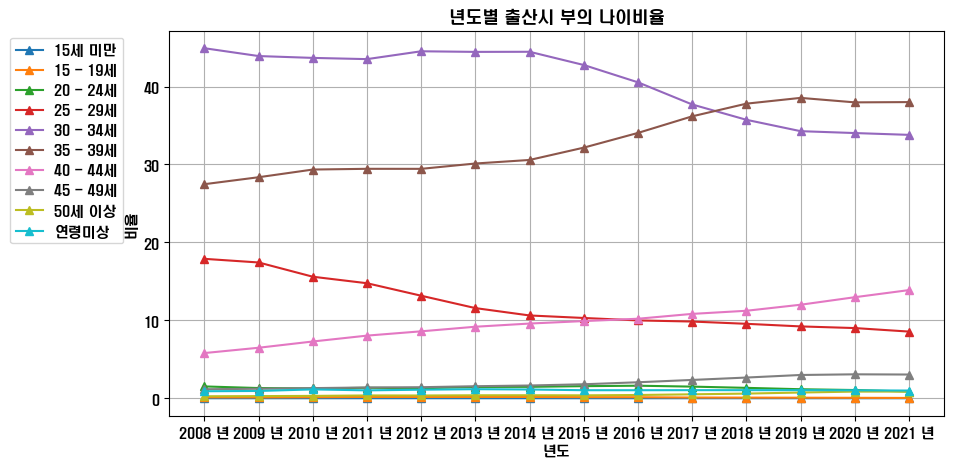

In [1309]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 쟁애 발생률 그래프 그리기
plt.plot(df_ratio_result_fa.T, '^-', label = list_collumn)

# 그래프 타이틀과 레이블 설정
plt.title('년도별 출산시 부의 나이비율')
plt.xlabel('년도')
plt.ylabel('비율')


# 그래프 출력
plt.grid(True)
plt.legend(bbox_to_anchor=(-0.05, 1))
plt.show()

In [1310]:
df_data_dis.head(5)

,연령별,장애인유형별,성별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 19
0,합계,합계,계,등록장애인수[명],명,2246965.0,2429547.0,2517312.0,2519241.0,2511159.0,2500961.0,2494460.0,2490406,2511051,2545637.0,2585876.0,2618918.0,2633026.0,2644700.0,NaN
1,합계,합계,남자,등록장애인수[명],명,1345557.0,1425896.0,1468333.0,1466460.0,1460490.0,1453532.0,1448878.0,1446943,1457588,1475550.0,1496298.0,1513206.0,1521260.0,1528280.0,NaN
2,합계,합계,여자,등록장애인수[명],명,901408.0,1003651.0,1048979.0,1052781.0,1050669.0,1047429.0,1045582.0,1043463,1053463,1070087.0,1089578.0,1105712.0,1111766.0,1116420.0,NaN
3,합계,지체,계,등록장애인수[명],명,1191013.0,1293331.0,1337722.0,1333429.0,1322131.0,1309285.0,1295608.0,1281497,1267174,1254130.0,1238532.0,1223135.0,1207368.0,1191462.0,NaN
4,합계,지체,남자,등록장애인수[명],명,719878.0,757670.0,777411.0,773142.0,765820.0,757723.0,749259.0,741089,732667,725384.0,716788.0,708246.0,699726.0,691136.0,NaN


In [1311]:
#48
df_data_dis_age = df_data_dis.iloc[::48,:19]

df_data_dis_age.set_index('연령별',inplace=True)
df_data_dis_age.head(13)


,장애인유형별,성별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,,,,,
합계,합계,계,등록장애인수[명],명,2246965.0,2429547.0,2517312.0,2519241.0,2511159.0,2500961.0,2494460.0,2490406,2511051,2545637.0,2585876.0,2618918.0,2633026.0,2644700.0
0-4세,합계,계,등록장애인수[명],명,5742.0,6475.0,5701.0,5352.0,5078.0,5011.0,5159.0,5313,5490,5673.0,5875.0,6159.0,5772.0,5571.0
0세,합계,계,등록장애인수[명],명,61.0,132.0,36.0,37.0,33.0,29.0,31.0,26,46,46.0,41.0,43.0,36.0,28.0
1세,합계,계,등록장애인수[명],명,648.0,774.0,493.0,401.0,508.0,437.0,446.0,459,521,517.0,482.0,483.0,381.0,409.0
2세,합계,계,등록장애인수[명],명,1195.0,1499.0,1170.0,1023.0,1097.0,1088.0,1067.0,1066,1047,1157.0,1066.0,1014.0,916.0,801.0
3세,합계,계,등록장애인수[명],명,1614.0,1732.0,1880.0,1569.0,1473.0,1549.0,1583.0,1566,1583,1640.0,1804.0,1721.0,1614.0,1599.0
4세,합계,계,등록장애인수[명],명,2224.0,2338.0,2122.0,2322.0,1967.0,1908.0,2032.0,2196,2293,2313.0,2482.0,2898.0,2825.0,2734.0
5-9세,합계,계,등록장애인수[명],명,21572.0,21986.0,20081.0,18762.0,18024.0,17673.0,17798.0,18735,20320,21583.0,23334.0,24961.0,25793.0,26733.0
5세,합계,계,등록장애인수[명],명,3012.0,3041.0,2747.0,2581.0,2808.0,2431.0,2498.0,2809,3108,3310.0,3300.0,3520.0,3957.0,4121.0


In [1312]:
df_data_dis_age.drop(['장애인유형별', '성별', '항목', '단위'], axis= 1, inplace= True)
df_data_dis_age

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
합계,2246965.0,2429547.0,2517312.0,2519241.0,2511159.0,2500961.0,2494460.0,2490406,2511051,2545637.0,2585876.0,2618918.0,2633026.0,2644700.0
0-4세,5742.0,6475.0,5701.0,5352.0,5078.0,5011.0,5159.0,5313,5490,5673.0,5875.0,6159.0,5772.0,5571.0
0세,61.0,132.0,36.0,37.0,33.0,29.0,31.0,26,46,46.0,41.0,43.0,36.0,28.0
1세,648.0,774.0,493.0,401.0,508.0,437.0,446.0,459,521,517.0,482.0,483.0,381.0,409.0
2세,1195.0,1499.0,1170.0,1023.0,1097.0,1088.0,1067.0,1066,1047,1157.0,1066.0,1014.0,916.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120-124세,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,1.0,1.0,1.0,1.0
120세,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,1.0,NaN,NaN,1.0
121세,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [1313]:
df_data_dis_age_short = df_data_dis_age.iloc[1:13,:]

df_data_dis_age_short = df_data_dis_age_short.astype(float)

df_data_dis_age_short

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
0-4세,5742.0,6475.0,5701.0,5352.0,5078.0,5011.0,5159.0,5313.0,5490.0,5673.0,5875.0,6159.0,5772.0,5571.0
0세,61.0,132.0,36.0,37.0,33.0,29.0,31.0,26.0,46.0,46.0,41.0,43.0,36.0,28.0
1세,648.0,774.0,493.0,401.0,508.0,437.0,446.0,459.0,521.0,517.0,482.0,483.0,381.0,409.0
2세,1195.0,1499.0,1170.0,1023.0,1097.0,1088.0,1067.0,1066.0,1047.0,1157.0,1066.0,1014.0,916.0,801.0
3세,1614.0,1732.0,1880.0,1569.0,1473.0,1549.0,1583.0,1566.0,1583.0,1640.0,1804.0,1721.0,1614.0,1599.0
4세,2224.0,2338.0,2122.0,2322.0,1967.0,1908.0,2032.0,2196.0,2293.0,2313.0,2482.0,2898.0,2825.0,2734.0
5-9세,21572.0,21986.0,20081.0,18762.0,18024.0,17673.0,17798.0,18735.0,20320.0,21583.0,23334.0,24961.0,25793.0,26733.0
5세,3012.0,3041.0,2747.0,2581.0,2808.0,2431.0,2498.0,2809.0,3108.0,3310.0,3300.0,3520.0,3957.0,4121.0
6세,3513.0,3813.0,3517.0,3205.0,3064.0,3651.0,3361.0,3579.0,4210.0,4637.0,4865.0,4658.0,4786.0,5591.0


In [1314]:
df_data_pop_short = df_data_pop.iloc[3:17:3,:19]
df_data_pop_short

,행정구역(시군구)별,연령별,항목,단위,2023.04 월,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
3,전국,0세,총인구수[명],명,236401,444421.0,424529.0,448516.0,451579.0,464374,421465,419833,424563,393674,345786,317685,295132,265087,253946
6,전국,1세,총인구수[명],명,261638,491498.0,464282.0,443963.0,470224.0,472275,486655,438778,437994,441720,409814,361625,330970,304651,274633
9,전국,2세,총인구수[명],명,273776,446884.0,492482.0,465564.0,445437.0,470956,474098,488030,439989,439207,442943,411225,362900,331606,306120
12,전국,3세,총인구수[명],명,296368,434320.0,447432.0,493452.0,466807.0,446256,472047,474932,488716,440530,439700,443586,412018,363250,332157
15,전국,4세,총인구수[명],명,324742,472935.0,434700.0,448200.0,494388.0,467432,447055,472731,475519,489140,440872,440123,444102,412429,363613


In [1315]:
df_data_pop_short.set_index('연령별', inplace=True)
df_data_pop_short = df_data_pop_short.iloc[:,4:]

In [1316]:
df_data_pop_short

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
0세,444421.0,424529.0,448516.0,451579.0,464374,421465,419833,424563,393674,345786,317685,295132,265087,253946
1세,491498.0,464282.0,443963.0,470224.0,472275,486655,438778,437994,441720,409814,361625,330970,304651,274633
2세,446884.0,492482.0,465564.0,445437.0,470956,474098,488030,439989,439207,442943,411225,362900,331606,306120
3세,434320.0,447432.0,493452.0,466807.0,446256,472047,474932,488716,440530,439700,443586,412018,363250,332157
4세,472935.0,434700.0,448200.0,494388.0,467432,447055,472731,475519,489140,440872,440123,444102,412429,363613


In [1317]:
df_data_pop_short_1 = df_data_pop_short.sum()

In [1318]:
df_data_pop_short.reset_index(inplace=True)

df_data_pop_short_2 = pd.concat([df_data_pop_short_1.to_frame().T, df_data_pop_short]).fillna('0-4세')

df_data_pop_short_2.set_index('연령별', inplace= True)
df_data_pop_short_2

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
0-4세,2290058.0,2263425.0,2299695.0,2328435.0,2321293.0,2301320.0,2294304.0,2266781.0,2204271.0,2079115.0,1974244.0,1845122.0,1677023.0,1530469.0
0세,444421.0,424529.0,448516.0,451579.0,464374.0,421465.0,419833.0,424563.0,393674.0,345786.0,317685.0,295132.0,265087.0,253946.0
1세,491498.0,464282.0,443963.0,470224.0,472275.0,486655.0,438778.0,437994.0,441720.0,409814.0,361625.0,330970.0,304651.0,274633.0
2세,446884.0,492482.0,465564.0,445437.0,470956.0,474098.0,488030.0,439989.0,439207.0,442943.0,411225.0,362900.0,331606.0,306120.0
3세,434320.0,447432.0,493452.0,466807.0,446256.0,472047.0,474932.0,488716.0,440530.0,439700.0,443586.0,412018.0,363250.0,332157.0
4세,472935.0,434700.0,448200.0,494388.0,467432.0,447055.0,472731.0,475519.0,489140.0,440872.0,440123.0,444102.0,412429.0,363613.0


In [1319]:
df_data_pop_short_5to10 = df_data_pop.iloc[18:31:3,:19]

df_data_pop_short_5to10.set_index('연령별', inplace=True)
df_data_pop_short_5to10 = df_data_pop_short_5to10.iloc[:,4:]
df_data_pop_short_5to10

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
5세,492914.0,473112.0,435281.0,448774.0,494810,467935,447531,473120,475817,489401,441105,440483,444367,412739
6세,494660.0,493040.0,473718.0,435724.0,449057,495221,468321,447817,473401,476061,489604,441362,440710,444555
7세,559549.0,494611.0,493551.0,473970.0,435863,449321,495536,468546,448049,473580,476168,489772,441560,440866
8세,639584.0,559360.0,495212.0,493658.0,474009,436031,449510,495761,468712,448183,473690,476358,489936,441672
9세,620098.0,639421.0,560067.0,495288.0,493679,474106,436172,449663,495918,468858,448251,473817,476474,490049


In [1320]:
df_data_pop_short_3 = df_data_pop_short_5to10.sum()

In [1321]:
df_data_pop_short_5to10.reset_index(inplace=True)

df_data_pop_short_4 = pd.concat([df_data_pop_short_3.to_frame().T, df_data_pop_short_5to10]).fillna('5-9세')

df_data_pop_short_4.set_index('연령별', inplace= True)
df_data_pop_short_4

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
5-9세,2806805.0,2659544.0,2457829.0,2347414.0,2347418.0,2322614.0,2297070.0,2334907.0,2361897.0,2356083.0,2328818.0,2321792.0,2293047.0,2229881.0
5세,492914.0,473112.0,435281.0,448774.0,494810.0,467935.0,447531.0,473120.0,475817.0,489401.0,441105.0,440483.0,444367.0,412739.0
6세,494660.0,493040.0,473718.0,435724.0,449057.0,495221.0,468321.0,447817.0,473401.0,476061.0,489604.0,441362.0,440710.0,444555.0
7세,559549.0,494611.0,493551.0,473970.0,435863.0,449321.0,495536.0,468546.0,448049.0,473580.0,476168.0,489772.0,441560.0,440866.0
8세,639584.0,559360.0,495212.0,493658.0,474009.0,436031.0,449510.0,495761.0,468712.0,448183.0,473690.0,476358.0,489936.0,441672.0
9세,620098.0,639421.0,560067.0,495288.0,493679.0,474106.0,436172.0,449663.0,495918.0,468858.0,448251.0,473817.0,476474.0,490049.0


In [1322]:
df_data_pop_final = pd.concat([df_data_pop_short_2,df_data_pop_short_4])

df_data_pop_final

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
0-4세,2290058.0,2263425.0,2299695.0,2328435.0,2321293.0,2301320.0,2294304.0,2266781.0,2204271.0,2079115.0,1974244.0,1845122.0,1677023.0,1530469.0
0세,444421.0,424529.0,448516.0,451579.0,464374.0,421465.0,419833.0,424563.0,393674.0,345786.0,317685.0,295132.0,265087.0,253946.0
1세,491498.0,464282.0,443963.0,470224.0,472275.0,486655.0,438778.0,437994.0,441720.0,409814.0,361625.0,330970.0,304651.0,274633.0
2세,446884.0,492482.0,465564.0,445437.0,470956.0,474098.0,488030.0,439989.0,439207.0,442943.0,411225.0,362900.0,331606.0,306120.0
3세,434320.0,447432.0,493452.0,466807.0,446256.0,472047.0,474932.0,488716.0,440530.0,439700.0,443586.0,412018.0,363250.0,332157.0
4세,472935.0,434700.0,448200.0,494388.0,467432.0,447055.0,472731.0,475519.0,489140.0,440872.0,440123.0,444102.0,412429.0,363613.0
5-9세,2806805.0,2659544.0,2457829.0,2347414.0,2347418.0,2322614.0,2297070.0,2334907.0,2361897.0,2356083.0,2328818.0,2321792.0,2293047.0,2229881.0
5세,492914.0,473112.0,435281.0,448774.0,494810.0,467935.0,447531.0,473120.0,475817.0,489401.0,441105.0,440483.0,444367.0,412739.0
6세,494660.0,493040.0,473718.0,435724.0,449057.0,495221.0,468321.0,447817.0,473401.0,476061.0,489604.0,441362.0,440710.0,444555.0


In [1323]:
df_ratio = df_data_dis_age_short / df_data_pop_final * 100

df_ratio

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
연령별,,,,,,,,,,,,,,
0-4세,0.250736,0.286071,0.247902,0.229854,0.218757,0.217745,0.224861,0.234385,0.249062,0.272856,0.297582,0.333799,0.344181,0.364006
0세,0.013726,0.031093,0.008026,0.008193,0.007106,0.006881,0.007384,0.006124,0.011685,0.013303,0.012906,0.014570,0.013580,0.011026
1세,0.131842,0.166709,0.111045,0.085279,0.107564,0.089797,0.101646,0.104796,0.117948,0.126155,0.133287,0.145935,0.125061,0.148926
2세,0.267407,0.304377,0.251308,0.229662,0.232930,0.229488,0.218634,0.242279,0.238384,0.261207,0.259225,0.279416,0.276231,0.261662
3세,0.371615,0.387098,0.380989,0.336113,0.330080,0.328145,0.333311,0.320431,0.359340,0.372982,0.406686,0.417700,0.444322,0.481399
4세,0.470255,0.537842,0.473449,0.469672,0.420810,0.426793,0.429843,0.461811,0.468782,0.524642,0.563933,0.652553,0.684966,0.751898
5-9세,0.768561,0.826683,0.817022,0.799263,0.767822,0.760910,0.774813,0.802387,0.860325,0.916054,1.001968,1.075075,1.124835,1.198853
5세,0.611060,0.642765,0.631087,0.575122,0.567491,0.519517,0.558174,0.593718,0.653192,0.676337,0.748121,0.799123,0.890480,0.998452
6세,0.710185,0.773365,0.742425,0.735557,0.682319,0.737247,0.717670,0.799210,0.889309,0.974035,0.993660,1.055370,1.085975,1.257662


In [1324]:
list_collumn_dis = df_ratio.index

list_collumn_dis

Index(['0-4세', '0세', '1세', '2세', '3세', '4세', '5-9세', '5세', '6세', '7세', '8세',
       '9세'],
      dtype='object', name='연령별')

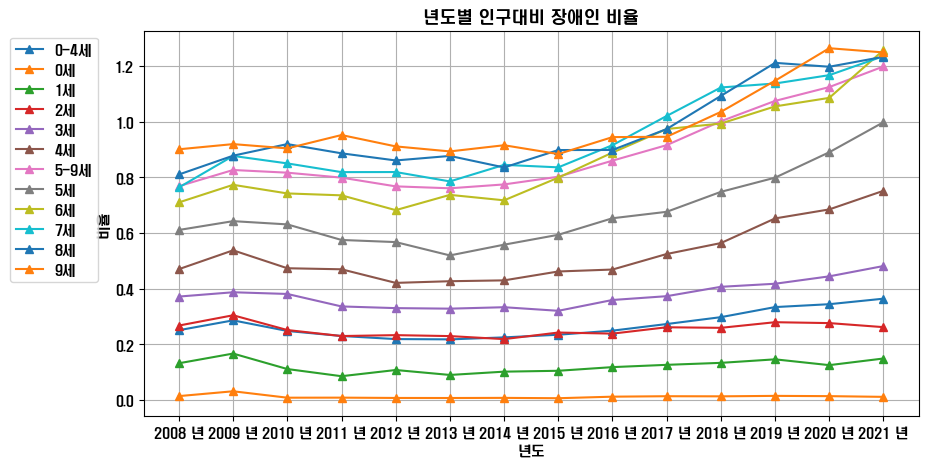

In [1325]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 쟁애 발생률 그래프 그리기
plt.plot(df_ratio.T, '^-', label = list_collumn_dis)

# 그래프 타이틀과 레이블 설정
plt.title('년도별 인구대비 장애인 비율')
plt.xlabel('년도')
plt.ylabel('비율')


# 그래프 출력
plt.grid(True)
plt.legend(bbox_to_anchor=(-0.05, 1))
plt.show()